In [1]:
from eda_and_clean.clean import clean_class
from eda_and_clean.eda import eda_class
from eda_and_clean.chart import histogram_plotly
import pandas as pd
from eda_and_clean.utils import print_dataframe_as_dataframe_definition, check_df_equal
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
!pytest tests

============================= test session starts =============================
platform win32 -- Python 3.7.15, pytest-7.2.0, pluggy-1.0.0
rootdir: c:\Users\1988a\GitRepo\eda_and_clean
collected 13 items

tests\test_clean_case_1.py .......                                       [ 53%]
tests\test_eda_case_1.py ......                                          [100%]

============================== warnings summary ===============================
..\..\anaconda3\envs\cleaning_lib\lib\site-packages\seaborn\rcmod.py:82
  C:\Users\1988a\anaconda3\envs\cleaning_lib\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning:
  
  distutils Version classes are deprecated. Use packaging.version instead.

..\..\anaconda3\envs\cleaning_lib\lib\site-packages\setuptools\_distutils\version.py:346
  C:\Users\1988a\anaconda3\envs\cleaning_lib\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:
  
  distutils Version classes are deprecated. Use packaging.version instead.

eda_and_c

In [27]:
airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'

airbnb_ori = pd.read_csv(airbnb_url)
airbnb = airbnb_ori.copy()

KeyboardInterrupt: 

# EDA

In [ ]:

%matplotlib agg
eda_instance_1 = eda_class(airbnb)

In [ ]:
eda_instance_1.get_output_attributes_of_class()

['DATA_ANALYSIS', 'DOWNCASTING', 'DTYPES', 'DUPLICATES', 'MISSING_VALUES']

In [ ]:
eda_instance_1.DATA_ANALYSIS.keys()

dict_keys(['plotly_correlation_numerical', 'plotly_correlation_non_numerical', 'histogram_matplotlib', 'describe', 'top_10_most_frequent_values'])

In [ ]:
eda_instance_1.get_additional_eda_functionality()

['cdf_plotly_', 'generate_describe_after_groupby_']

In [ ]:
eda_instance_1.MISSING_VALUES.keys()

dict_keys(['columns_with_no_null_values', 'columns_with_null_values', 'percentage_of_missing_values', 'percentage_of_non_missing_values', 'dates_continuity_check', 'plotly_missing_values_heatmap', 'plotly_correlation_missing_values', 'na_like_values_in_str_columns', 'na_in_datetime_columns'])

In [ ]:
eda_instance_1.DATA_ANALYSIS.keys()

dict_keys(['plotly_correlation_numerical', 'plotly_correlation_non_numerical', 'histogram_matplotlib', 'describe', 'top_10_most_frequent_values'])

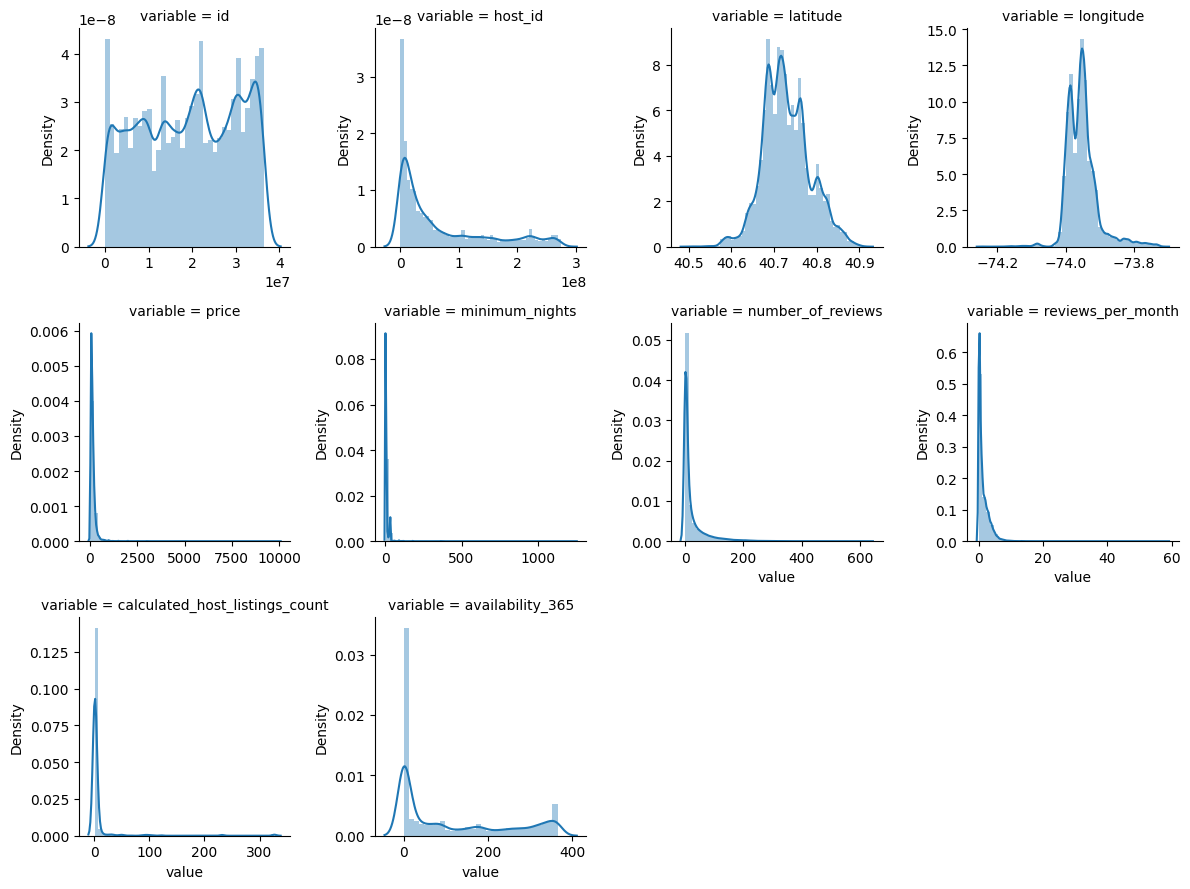

In [ ]:
eda_instance_1.DATA_ANALYSIS['histogram_matplotlib']

In [ ]:
histogram_plotly(df = airbnb, \
                x_col_name = "price", \
                    y_col_name = None, \
                        x_title_text = "price", \
                            y_title_text = "count",\
                                title = "Price Distribution", \
                                    nbins = 100)

# Cleaning

In [ ]:
# Initialize cleaning class
cleaning_instance_1 = clean_class()

# Defining dict to convert
dict_to_convert = {}
dict_to_convert['float32'] = eda_instance_1.DOWNCASTING["to_float32"]
dict_to_convert['datetime64[ns]'] = eda_instance_1.DTYPES["datetime"]

# Start cleaning
input = airbnb.copy()
df_1_ = input.pipe(cleaning_instance_1.remove_existing_index_and_make_new_one).\
    pipe(cleaning_instance_1.drop_duplicate_rows).\
    pipe(cleaning_instance_1.drop_columns, cols_to_drop=[]).\
    pipe(cleaning_instance_1.convert_dtype, dict_with_cols_to_convert=dict_to_convert).\
    pipe(cleaning_instance_1.clean_str_columns, str_cols_to_clean=["name"]).\
    pipe(cleaning_instance_1.clean_str_columns, str_cols_to_clean=["host_name"], operations_to_perform=["make_str_col_lowercase"]).\
    pipe(cleaning_instance_1.make_negative_na, cols_that_should_not_have_negative=["price"]).\
    pipe(cleaning_instance_1.make_zero_na, cols_that_should_not_have_zero=["minimum_nights","price"])

# Make entries as na
dict_with_col_name_as_key_and_mask_as_value_to_make_na = {}
dict_with_col_name_as_key_and_mask_as_value_to_make_na["minimum_nights"] = df_1_["minimum_nights"] > 100  
df_2_ = cleaning_instance_1.make_masked_entries_na(_df = df_1_, dict_with_col_name_as_key_and_mask_as_value_to_make_na = \
    dict_with_col_name_as_key_and_mask_as_value_to_make_na)

# Rows to drop
df_3_ = cleaning_instance_1.drop_rows(_df = df_2_, row_mask_to_drop = df_2_["price"] > 10_000)

In [ ]:
# Check if two dataframes are equal
check_df_equal(df_3_, cleaning_instance_1.OUTPUT)

True

In [ ]:
def get_dataframe_info(df):
    """
    input
       df -> DataFrame
    output
       df_null_counts -> DataFrame Info (sorted)
    """

    df_types = pd.DataFrame(df.dtypes)
    df_nulls = df.count()
    
    df_null_count = pd.concat([df_types, df_nulls], axis=1)
    df_null_count = df_null_count.reset_index()
    
    # Reassign column names
    col_names = ["features", "types", "non_null_counts"]
    df_null_count.columns = col_names
    
    # Add this to sort
    df_null_count = df_null_count.sort_values(by=["null_counts"], ascending=False)
    
    return df_null_count

# Generate text fixtures - clean

In [9]:
from tests.fixtures.case_1.input import input_1_fixture
from tests.fixtures.case_1.output_clean import (
    output_1_clean_str_columns,
    output_1_convert_dtype,
    output_1_drop_columns,
    output_1_drop_duplicate_rows,
    output_1_drop_rows,
    output_1_make_masked_entries_na,
    output_1_remove_existing_index_and_make_new_one,
)
from tests.utils import assert_dataframe

In [5]:
%matplotlib agg
eda_instance_test_1 = eda_class(_df = input_1_fixture())

c:\Users\1988a\GitRepo\eda_and_clean\eda_and_clean\clean.py:146: UserWarning:

Could not make date lowercase

c:\Users\1988a\anaconda3\envs\cleaning_lib\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



In [19]:
input_1_fixture().dtypes

uid                int32
date      datetime64[ns]
id                object
desc              object
value            float64
volume           float64
random           float64
dtype: object

In [6]:
clean_instance_test_1 = clean_class()

df_test_1 = eda_instance_test_1.raw_input.pipe(clean_instance_test_1.remove_existing_index_and_make_new_one)
clean_instance_test_1.TRACKER

,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN


In [7]:
print_dataframe_as_dataframe_definition(df_test_1)

"pd.DataFrame({'uid': {0: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 1: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 6: pd.to_datetime('2020-06-30 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 1: 'A', 2: 'A', 3: 'B', 4: 'C', 5: 'na', 6: 'A', 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: '

In [20]:
assert_dataframe(actual=df_test_1, expected=output_1_remove_existing_index_and_make_new_one(),check_dtype=False)

TypeError: assert_dataframe() got an unexpected keyword argument 'check_dtype'

In [13]:
df_test_1 == output_1_remove_existing_index_and_make_new_one()

,uid,date,id,desc,value,volume,random
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,False,False,False
7,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


In [14]:
df_test_1

,uid,date,id,desc,value,volume,random
0,1,2019-12-31,A,this is A,5.0,1.0,1.0
1,1,2019-12-31,A,this is A,5.0,1.0,1.0
2,2,2020-03-31,A,this is A,10.0,2.0,1.0
3,3,2020-03-31,B,this is B,20.0,4.0,1.0
4,4,2020-03-31,C,this is C,30.0,6.0,1.0
5,5,2020-03-31,na,,40.0,8.0,1.0
6,6,2020-06-30,A,this is A,NaN,NaN,NaN
7,7,2020-06-30,E,this is E,17.0,3.0,1.0
8,8,2020-06-30,B,this is B,20.0,4.0,1.0
9,9,2020-09-30,A,this is A,10.0,2.0,1.0


In [16]:
output_1_remove_existing_index_and_make_new_one()

,uid,date,id,desc,value,volume,random
0,1,2019-12-31,A,this is A,5.0,1.0,1.0
1,1,2019-12-31,A,this is A,5.0,1.0,1.0
2,2,2020-03-31,A,this is A,10.0,2.0,1.0
3,3,2020-03-31,B,this is B,20.0,4.0,1.0
4,4,2020-03-31,C,this is C,30.0,6.0,1.0
5,5,2020-03-31,na,,40.0,8.0,1.0
6,6,2020-06-30,A,this is A,NaN,NaN,NaN
7,7,2020-06-30,E,this is E,17.0,3.0,1.0
8,8,2020-06-30,B,this is B,20.0,4.0,1.0
9,9,2020-09-30,A,this is A,10.0,2.0,1.0


In [64]:
check_df_equal(df_test_1, input_1_fixture())

True

In [65]:
df_test_2 = df_test_1.pipe(clean_instance_test_1.drop_duplicate_rows)
clean_instance_test_1.TRACKER

,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN
0,2,drop_duplicate_rows,[],0,[1],1


In [66]:
print_dataframe_as_dataframe_definition(df_test_2)

"pd.DataFrame({'uid': {0: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 6: pd.to_datetime('2020-06-30 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 2: 'A', 3: 'B', 4: 'C', 5: 'na', 6: 'A', 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: 'B', 15: 'C', 16: 'G'}, 'desc': {0: 'this is A', 2: 'this

In [67]:
check_df_equal(df_test_2, input_1_fixture())

There is a difference in the shape of the dataframes


False

In [68]:
df_test_2

,uid,date,id,desc,value,volume,random
0,1,2019-12-31,A,this is A,5.0,1.0,1.0
2,2,2020-03-31,A,this is A,10.0,2.0,1.0
3,3,2020-03-31,B,this is B,20.0,4.0,1.0
4,4,2020-03-31,C,this is C,30.0,6.0,1.0
5,5,2020-03-31,na,,40.0,8.0,1.0
6,6,2020-06-30,A,this is A,NaN,NaN,NaN
7,7,2020-06-30,E,this is E,17.0,3.0,1.0
8,8,2020-06-30,B,this is B,20.0,4.0,1.0
9,9,2020-09-30,A,this is A,10.0,2.0,1.0
10,10,2020-09-30,F,this is F,20.0,4.0,1.0


In [69]:
df_test_3 = df_test_2.pipe(clean_instance_test_1.drop_columns, cols_to_drop=["random"])
clean_instance_test_1.TRACKER

,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN
0,2,drop_duplicate_rows,[],0,[1],1
0,3,drop_columns,[random],1,[],NaN


In [70]:
check_df_equal(df_test_3, df_test_2.drop(columns=["random"]))

True

In [71]:
print_dataframe_as_dataframe_definition(df_test_3)

"pd.DataFrame({'uid': {0: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 6: pd.to_datetime('2020-06-30 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 2: 'A', 3: 'B', 4: 'C', 5: 'na', 6: 'A', 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: 'B', 15: 'C', 16: 'G'}, 'desc': {0: 'this is A', 2: 'this

In [72]:
dict_to_convert = {}
dict_to_convert["float32"] = eda_instance_test_1.DOWNCASTING["to_float32"]
df_test_4 = df_test_3.pipe(clean_instance_test_1.convert_dtype, dict_with_cols_to_convert=dict_to_convert)
clean_instance_test_1.TRACKER

,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN
0,2,drop_duplicate_rows,[],0,[1],1
0,3,drop_columns,[random],1,[],NaN
0,4,converting_to_float32,"[value, volume]",2,[],NaN


In [73]:
check_df_equal(df_test_4, df_test_3.astype({"volume": "float32","value":"float32"}))

True

In [74]:
input_1_fixture().dtypes

uid                int32
date      datetime64[ns]
id                object
desc              object
value            float64
volume           float64
random           float64
dtype: object

In [75]:
print_dataframe_as_dataframe_definition(df_test_4)

"pd.DataFrame({'uid': {0: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 6: pd.to_datetime('2020-06-30 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 2: 'A', 3: 'B', 4: 'C', 5: 'na', 6: 'A', 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: 'B', 15: 'C', 16: 'G'}, 'desc': {0: 'this is A', 2: 'this

In [76]:
df_test_5 = df_test_4.pipe(clean_instance_test_1.clean_str_columns, str_cols_to_clean=["desc"], operations_to_perform=[
            "make_str_col_lowercase",
            "tokenize_remove_stop_words_and_stem",
            "remove_punctuation",
            "remove_non_alphabets",
        ], list_of_stopwords_to_remove = ["a"])
clean_instance_test_1.TRACKER

,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN
0,2,drop_duplicate_rows,[],0,[1],1
0,3,drop_columns,[random],1,[],NaN
0,4,converting_to_float32,"[value, volume]",2,[],NaN
0,5,clean_str_columns,[desc],1,[],NaN


In [77]:
df_test_5

,uid,date,id,desc,value,volume
0,1,2019-12-31,A,a,5.0,1.0
2,2,2020-03-31,A,a,10.0,2.0
3,3,2020-03-31,B,b,20.0,4.0
4,4,2020-03-31,C,c,30.0,6.0
5,5,2020-03-31,na,,40.0,8.0
6,6,2020-06-30,A,a,NaN,NaN
7,7,2020-06-30,E,e,17.0,3.0
8,8,2020-06-30,B,b,20.0,4.0
9,9,2020-09-30,A,a,10.0,2.0
10,10,2020-09-30,F,f,20.0,4.0


In [78]:
print_dataframe_as_dataframe_definition(df_test_5)

"pd.DataFrame({'uid': {0: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 6: pd.to_datetime('2020-06-30 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 2: 'A', 3: 'B', 4: 'C', 5: 'na', 6: 'A', 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: 'B', 15: 'C', 16: 'G'}, 'desc': {0: 'a', 2: 'a', 3: 'b', 

In [79]:
eda_instance_test_1.get_output_attributes_of_class()

['DATA_ANALYSIS',
 'DOWNCASTING',
 'DTYPES',
 'DUPLICATES',
 'MISSING_VALUES',
 'SUMMARY']

In [80]:
eda_instance_test_1.MISSING_VALUES.keys()

dict_keys(['dates_continuity_check', 'plotly_missing_values_heatmap', 'plotly_correlation_missing_values', 'na_like_values_in_str_columns', 'na_in_datetime_columns'])

In [81]:
eda_instance_test_1_2 = eda_class(_df = df_test_5)

c:\Users\1988a\GitRepo\eda_and_clean\eda_and_clean\clean.py:194: UserWarning:

Could not make date lowercase



In [82]:
eda_instance_test_1_2.MISSING_VALUES['na_like_values_in_str_columns']

{'id': ['na'], 'desc': ['']}

In [83]:
df_test_6 = clean_instance_test_1.make_masked_entries_na(_df = df_test_5, dict_with_col_name_as_key_and_mask_as_value_to_make_na = \
    {"id":df_test_5["id"]=="na","desc":df_test_5["desc"]==""})
clean_instance_test_1.TRACKER

,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN
0,2,drop_duplicate_rows,[],0,[1],1
0,3,drop_columns,[random],1,[],NaN
0,4,converting_to_float32,"[value, volume]",2,[],NaN
0,5,clean_str_columns,[desc],1,[],NaN
0,6,make_mask_na,[id],1,[5],1
0,7,make_mask_na,[desc],1,[5],1


In [84]:
print_dataframe_as_dataframe_definition(df_test_6)

"pd.DataFrame({'uid': {0: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 6: pd.to_datetime('2020-06-30 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 2: 'A', 3: 'B', 4: 'C', 5: np.nan, 6: 'A', 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: 'B', 15: 'C', 16: 'G'}, 'desc': {0: 'a', 2: 'a', 3: 'b'

In [89]:
df_test_6.shape

(16, 6)

In [86]:
# Rows to drop
df_test_7 = clean_instance_test_1.drop_rows(_df = df_test_6,row_mask_to_drop = df_test_6["value"].isna())
clean_instance_test_1.TRACKER

c:\Users\1988a\GitRepo\eda_and_clean\eda_and_clean\clean.py:112: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\Users\1988a\GitRepo\eda_and_clean\eda_and_clean\clean.py:113: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,order,activity,cols_impacted,num_of_cols_impacted,rows_impacted,num_of_rows_impacted
0,1,remove_existing_index_and_make_new_one,[],0,[],NaN
0,2,drop_duplicate_rows,[],0,[1],1
0,3,drop_columns,[random],1,[],NaN
0,4,converting_to_float32,"[value, volume]",2,[],NaN
0,5,clean_str_columns,[desc],1,[],NaN
0,6,make_mask_na,[id],1,[5],1
0,7,make_mask_na,[desc],1,[5],1
0,8,drop_rows,[],0,[],0


In [88]:
df_test_7.shape

(15, 6)

In [91]:
print_dataframe_as_dataframe_definition(df_test_7)

"pd.DataFrame({'uid': {0: 1, 2: 2, 3: 3, 4: 4, 5: 5, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}, 'date': {0: pd.to_datetime('2019-12-31 00:00:00'), 2: pd.to_datetime('2020-03-31 00:00:00'), 3: pd.to_datetime('2020-03-31 00:00:00'), 4: pd.to_datetime('2020-03-31 00:00:00'), 5: pd.to_datetime('2020-03-31 00:00:00'), 7: pd.to_datetime('2020-06-30 00:00:00'), 8: pd.to_datetime('2020-06-30 00:00:00'), 9: pd.to_datetime('2020-09-30 00:00:00'), 10: pd.to_datetime('2020-09-30 00:00:00'), 11: pd.to_datetime('2020-09-30 00:00:00'), 12: pd.to_datetime('2020-09-30 00:00:00'), 13: pd.to_datetime('2020-12-31 00:00:00'), 14: pd.to_datetime('2020-12-31 00:00:00'), 15: pd.to_datetime('2020-12-31 00:00:00'), 16: pd.to_datetime('2020-12-31 00:00:00')}, 'id': {0: 'A', 2: 'A', 3: 'B', 4: 'C', 5: np.nan, 7: 'E', 8: 'B', 9: 'A', 10: 'F', 11: 'B', 12: 'C', 13: 'A', 14: 'B', 15: 'C', 16: 'G'}, 'desc': {0: 'a', 2: 'a', 3: 'b', 4: 'c', 5: np.nan, 7: 'e', 8: 'b', 9: 'a', 10: 'f', 11

In [92]:
from inspect import getmembers, isfunction

from tests.fixtures.case_1 import output_clean
print(getmembers(output_clean, isfunction))

[('output_1_clean_str_columns', <function output_1_clean_str_columns at 0x0000026A93C63E58>), ('output_1_convert_dtype', <function output_1_convert_dtype at 0x0000026A93C63D38>), ('output_1_drop_columns', <function output_1_drop_columns at 0x0000026A93C63AF8>), ('output_1_drop_duplicate_rows', <function output_1_drop_duplicate_rows at 0x0000026A93C63CA8>), ('output_1_drop_rows', <function output_1_drop_rows at 0x0000026A93C63DC8>), ('output_1_make_masked_entries_na', <function output_1_make_masked_entries_na at 0x0000026A93C63EE8>), ('output_1_remove_existing_index_and_make_new_one', <function output_1_remove_existing_index_and_make_new_one at 0x0000026A93C634C8>)]


In [93]:
getmembers(output_clean, isfunction)

[('output_1_clean_str_columns',
  <function tests.fixtures.case_1.output_clean.output_1_clean_str_columns()>),
 ('output_1_convert_dtype',
  <function tests.fixtures.case_1.output_clean.output_1_convert_dtype()>),
 ('output_1_drop_columns',
  <function tests.fixtures.case_1.output_clean.output_1_drop_columns()>),
 ('output_1_drop_duplicate_rows',
  <function tests.fixtures.case_1.output_clean.output_1_drop_duplicate_rows()>),
 ('output_1_drop_rows',
  <function tests.fixtures.case_1.output_clean.output_1_drop_rows()>),
 ('output_1_make_masked_entries_na',
  <function tests.fixtures.case_1.output_clean.output_1_make_masked_entries_na()>),
 ('output_1_remove_existing_index_and_make_new_one',
  <function tests.fixtures.case_1.output_clean.output_1_remove_existing_index_and_make_new_one()>)]